<a href="https://colab.research.google.com/github/srirampandi99/CODSOFT/blob/main/customer_churn_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CUSTOMER CHURN DETECTION**

In [ ]:

# Install the gdown library
!pip install gdown

# https://drive.google.com/file/d/1jwbP6-lapWYFGdqxYGk348_rquglvaSE/view?usp=sharing

# Define the direct download link from your Google Drive
file_id = "1jwbP6-lapWYFGdqxYGk348_rquglvaSE"
url = f"https://drive.google.com/uc?id={file_id}"

# Define the local file path where you want to save the dataset
output_path = "/content/dataset.csv"

# Download the dataset using gdown
import gdown
gdown.download(url, output_path, quiet=False)
encoding = "ISO-8859-1"

# Now you can read the dataset using pandas or any other relevant library
import pandas as pd
df = pd.read_csv(output_path,encoding=encoding)



Downloading...
From: https://drive.google.com/uc?id=1jwbP6-lapWYFGdqxYGk348_rquglvaSE
To: /content/dataset.csv
100%|██████████| 685k/685k [00:00<00:00, 59.7MB/s]


In [ ]:
#import platform
import pandas as pd
import sklearn
import numpy as np
from collections import Counter
#import graphviz
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

Exploratory Data Analysis

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

Basic Data Cleaning

In [ ]:
# Drop unused features
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print(f"Dataframe dimensions: {df.shape}")
df.head()

Dataframe dimensions: (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Distributions of Numeric Features

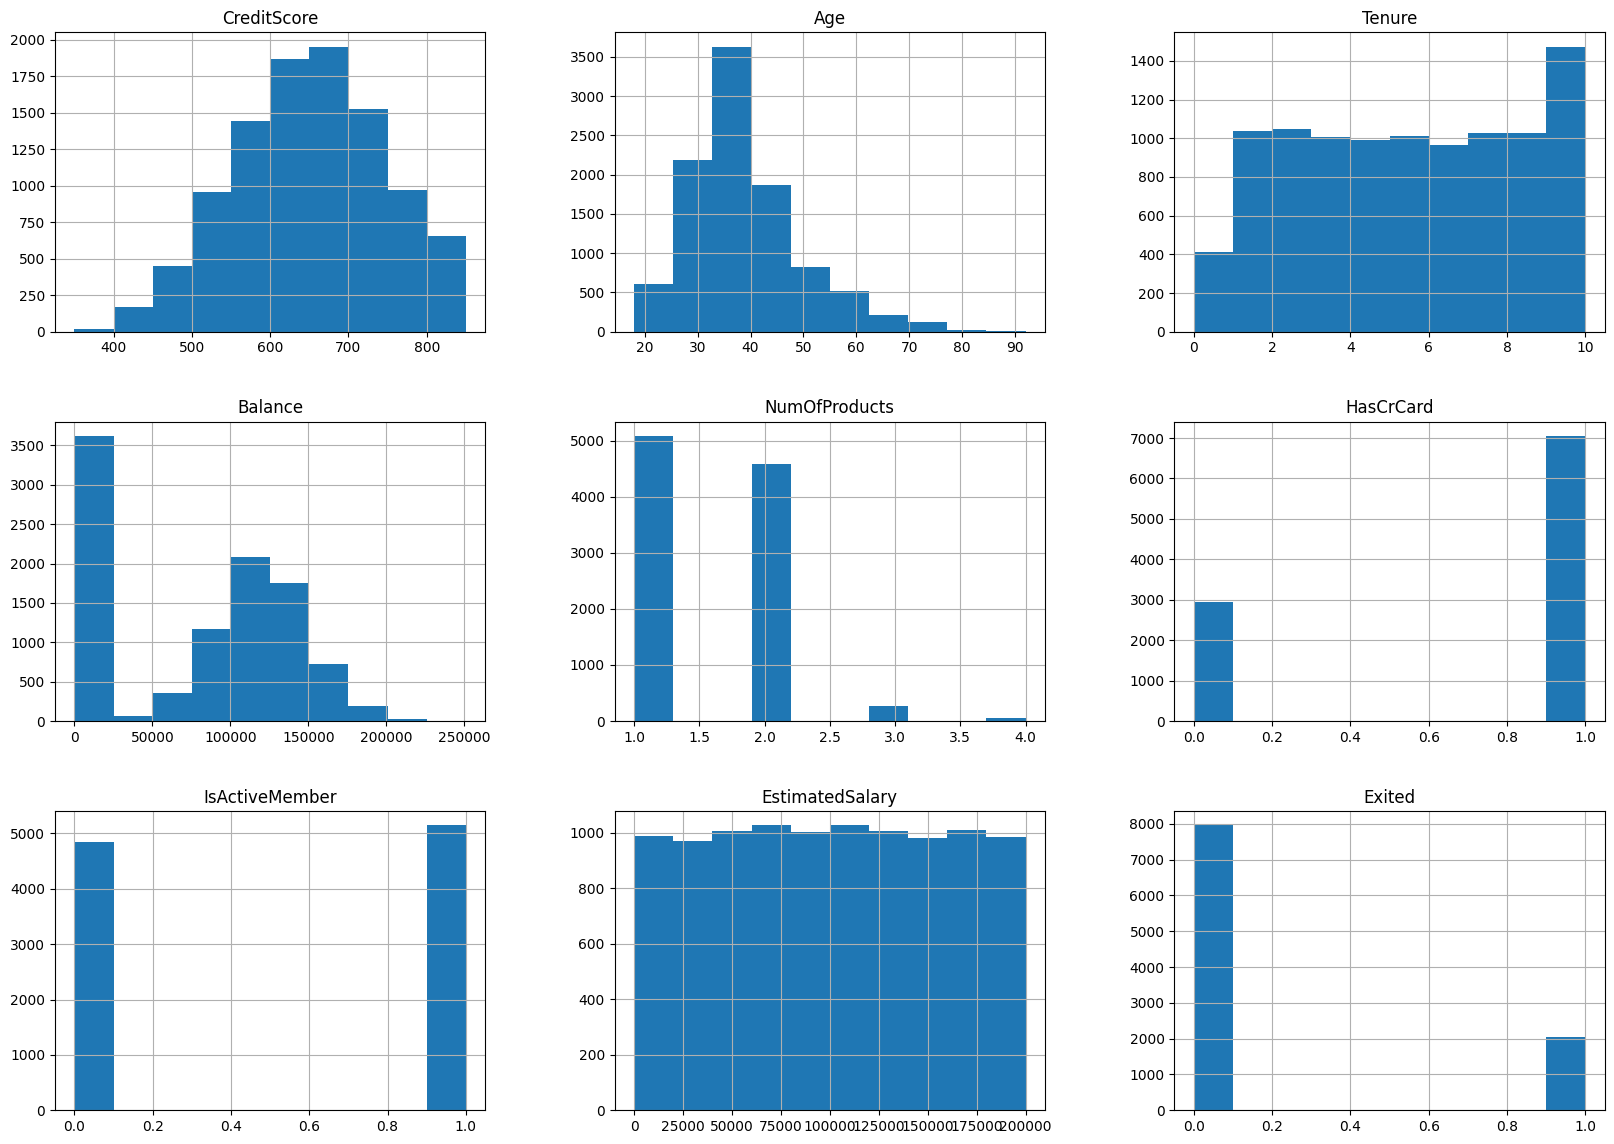

In [ ]:
# Plot histogram grid
df.hist(figsize=(20,14))
plt.show()

In [ ]:
# Summarize numerical features
df.describe(include=['integer','float'])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Distributions of Categorical Features

In [ ]:
# Summarize categorical features
df.describe(include=['object'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


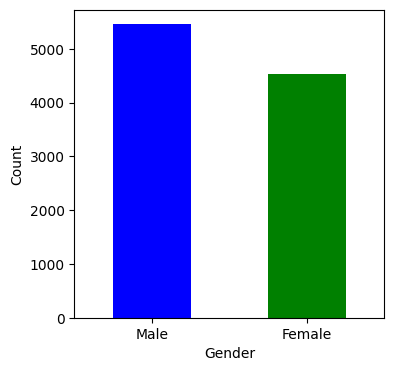

Counter({'Female': 4543, 'Male': 5457})

In [ ]:
# Bar plot for "Gender"
plt.figure(figsize=(4,4))
df['Gender'].value_counts().plot.bar(color=['b', 'g'])
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

# Display count of each class
Counter(df.Gender)

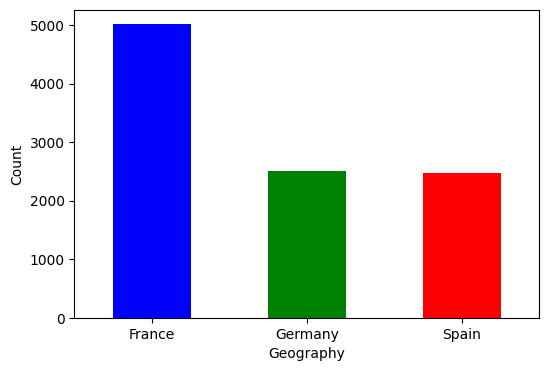

Counter({'France': 5014, 'Spain': 2477, 'Germany': 2509})

In [ ]:
# Bar plot for "Geography"
plt.figure(figsize=(6,4))
df['Geography'].value_counts().plot.bar(color=['b', 'g', 'r'])
plt.ylabel('Count')
plt.xlabel('Geography')
plt.xticks(rotation=0)
plt.show()

# Display count of each class
Counter(df.Geography)

Churn Segmentation by Gender

In [ ]:
grouped = df.groupby('Gender')['Exited'].agg(Count='value_counts')
grouped

Count
Gender Exited       
Female 0        3404
       1        1139
Male   0        4559
       1         898

In [ ]:
dfgc = grouped
dfgc = dfgc.pivot_table(values='Count', index='Gender', columns=['Exited'])
dfgc

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [ ]:
dfgp = grouped.groupby(level=[0],group_keys=True).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgp.rename(columns={'Count': 'Percentage'}, inplace=True)
dfgp

Percentage
Gender Gender Exited            
Female Female 0            74.93
              1            25.07
Male   Male   0            83.54
              1            16.46

In [ ]:
dfgp = dfgp.pivot_table(values='Percentage', index='Gender', columns=['Exited'])
dfgp

Exited,0,1
Gender,,
Female,74.93,25.07
Male,83.54,16.46


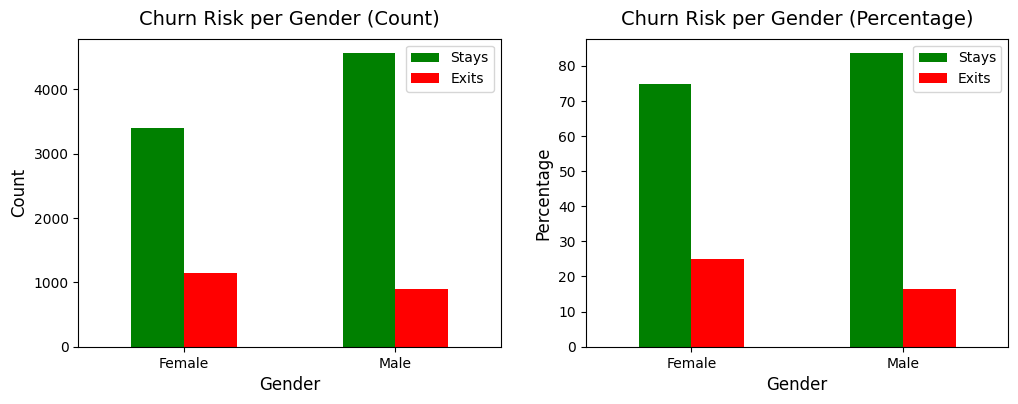

In [ ]:
# Churn distribution by gender, count + percentage

labels= ['Stays', 'Exits']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

dfgc.plot(kind='bar',
          color=['g', 'r'],
          rot=0,
          ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Gender (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Gender', size=12)


dfgp.plot(kind='bar',
          color=['g', 'r'],
          rot=0,
          ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Gender (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Gender', size=12)

plt.show()

Churn Segmentation by Geography

In [ ]:
grouped = df.groupby('Geography')['Exited'].agg(Count='value_counts')
grouped

Count
Geography Exited       
France    0        4204
          1         810
Germany   0        1695
          1         814
Spain     0        2064
          1         413

In [ ]:
dfgeoc = grouped
dfgeoc = dfgeoc.pivot_table(values='Count', index='Geography', columns=['Exited'])
dfgeoc

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [ ]:
dfgeop = grouped.groupby(level=[0], group_keys=False).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgeop.rename(columns={'Count': 'Percentage'}, inplace=True)
dfgeop

Percentage
Geography Exited            
France    0            83.85
          1            16.15
Germany   0            67.56
          1            32.44
Spain     0            83.33
          1            16.67

In [ ]:
dfgeop = dfgeop.pivot_table(values='Percentage', index='Geography', columns=['Exited'])
dfgeop

Exited,0,1
Geography,,
France,83.85,16.15
Germany,67.56,32.44
Spain,83.33,16.67


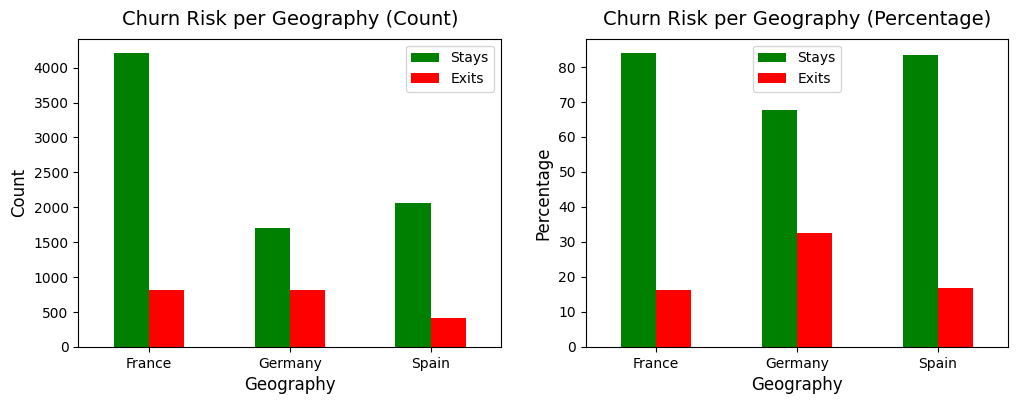

In [ ]:
# Churn distribution by geography, count + percentage

labels= ['Stays', 'Exits']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

dfgeoc.plot(kind='bar',
          color=['g', 'r'],
          rot=0,
          ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Geography (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Geography', size=12)


dfgeop.plot(kind='bar',
          color=['g', 'r'],
          rot=0,
          ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Geography (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Geography', size=12)

plt.show()

Correlations

In [ ]:
# Calculate correlations between numeric features
correlations = df.corr()

sort_corr_cols = correlations.Exited.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols,sort_corr_cols]
sort_corr

<ipython-input-181-a5bb35fb7621>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


,Exited,Age,Balance,EstimatedSalary,HasCrCard,Tenure,CreditScore,NumOfProducts,IsActiveMember
Exited,1.000000,0.285323,0.118533,0.012097,-0.007138,-0.014001,-0.027094,-0.047820,-0.156128
Age,0.285323,1.000000,0.028308,-0.007201,-0.011721,-0.009997,-0.003965,-0.030680,0.085472
Balance,0.118533,0.028308,1.000000,0.012797,-0.014858,-0.012254,0.006268,-0.304180,-0.010084
EstimatedSalary,0.012097,-0.007201,0.012797,1.000000,-0.009933,0.007784,-0.001384,0.014204,-0.011421
HasCrCard,-0.007138,-0.011721,-0.014858,-0.009933,1.000000,0.022583,-0.005458,0.003183,-0.011866
Tenure,-0.014001,-0.009997,-0.012254,0.007784,0.022583,1.000000,0.000842,0.013444,-0.028362
CreditScore,-0.027094,-0.003965,0.006268,-0.001384,-0.005458,0.000842,1.000000,0.012238,0.025651
NumOfProducts,-0.047820,-0.030680,-0.304180,0.014204,0.003183,0.013444,0.012238,1.000000,0.009612
IsActiveMember,-0.156128,0.085472,-0.010084,-0.011421,-0.011866,-0.028362,0.025651,0.009612,1.000000


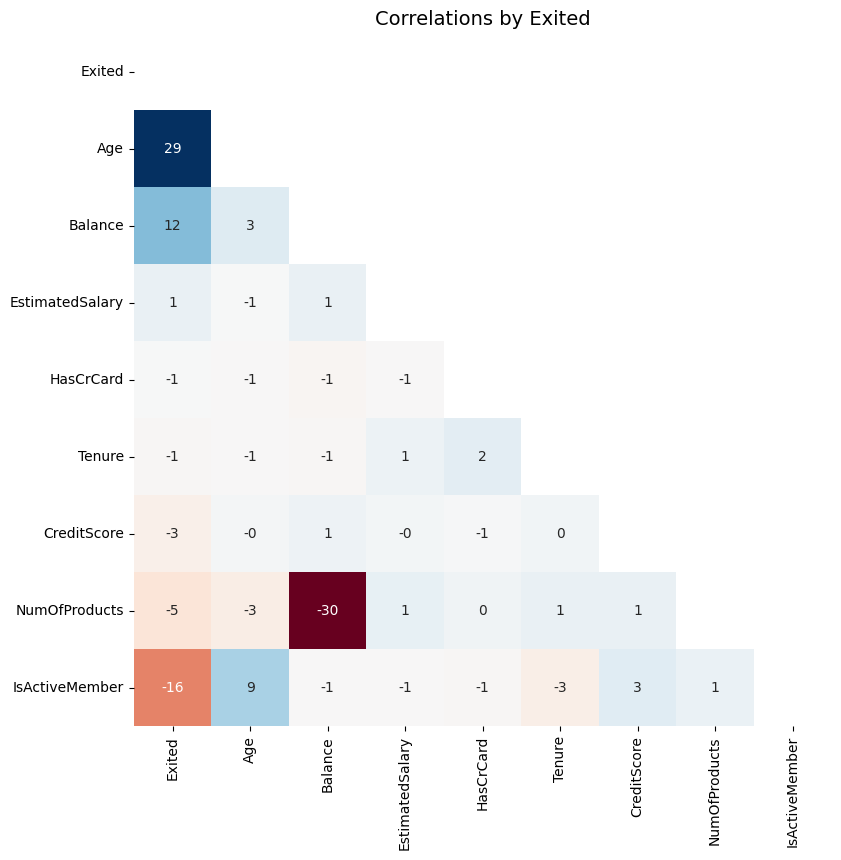

In [ ]:
#Let's use Seaborn's .heatmap() function to visualize the correlation grid
corr_mask = np.zeros_like(correlations)
corr_mask[np.triu_indices_from(corr_mask)] = 1

plt.figure(figsize=(9,9))

sns.heatmap(sort_corr*100,
                cmap='RdBu',
                annot=True,
                fmt='.0f',
                mask=corr_mask,
                cbar=False)

plt.title('Correlations by Exited', fontsize=14)
plt.yticks(rotation=0)
plt.show()

Distributions of the Target Feature

In [ ]:
y = df.Exited

In [ ]:
y.shape

(10000,)

In [ ]:
# Function to display count and percentage per class of target feature
def class_count(a):
    counter=Counter(a)
    kv=[list(counter.keys()),list(counter.values())]
    dff = pd.DataFrame(np.array(kv).T, columns=['Exited','Count'])
    dff['Count'] = dff['Count'].astype('int64')
    dff['%'] = round(dff['Count'] / a.shape[0] * 100, 2)
    return dff.sort_values('Count',ascending=False)

In [ ]:
dfcc = class_count(y)
dfcc

,Exited,Count,%
1,0,7963,79.63
0,1,2037,20.37


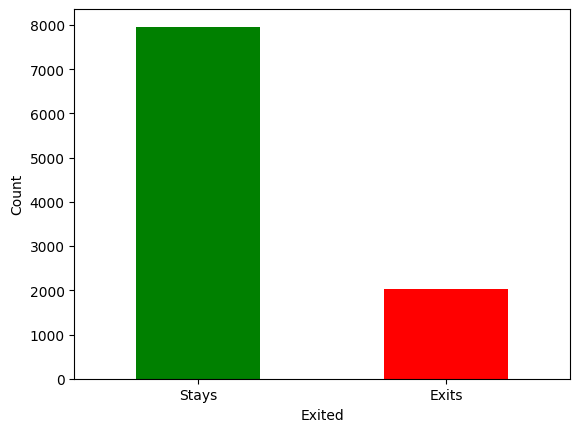

In [ ]:
labels=['Stays', 'Exits']
dfcc.plot.bar(x='Exited', y='Count', color=['g', 'r'], legend=False)
plt.xticks(dfcc['Exited'], labels, rotation=0)
plt.ylabel('Count')
plt.show()

In [ ]:
#Finalizing the Dataframe
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Data modeling and model evaluation



In [ ]:
#Load preprocessed data

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

dataset=pd.read_csv('dataset.csv')

encoder = LabelEncoder()
dataset["Geography"] = encoder.fit_transform(dataset["Geography"])
dataset["Gender"] = encoder.fit_transform(dataset["Gender"])

dataset.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [ ]:
#Divide the whole dataset into training data and test data

X = dataset.drop("Exited", axis=1)
y = dataset["Exited"]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


Cross validation to divide the whole dataset into training data and test data

In [ ]:
#Cross validation to divide the whole dataset into training data and test data

from sklearn.model_selection import KFold
k = 10
kf = KFold(n_splits = k, random_state = None)
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
#Predict churn based some models

from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score)

Accuracy: 80.20%


<Axes: >

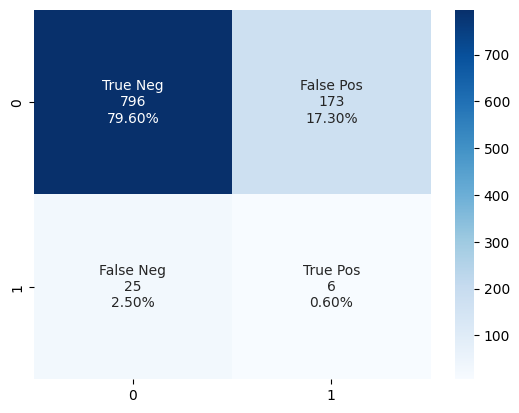

In [ ]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

accuracy = accuracy_score(pred, y_test)
print("Accuracy:", '{:.2%}'.format(accuracy))

cf_matrix = confusion_matrix(pred, y_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')

Accuracy: 80.40%


<Axes: >

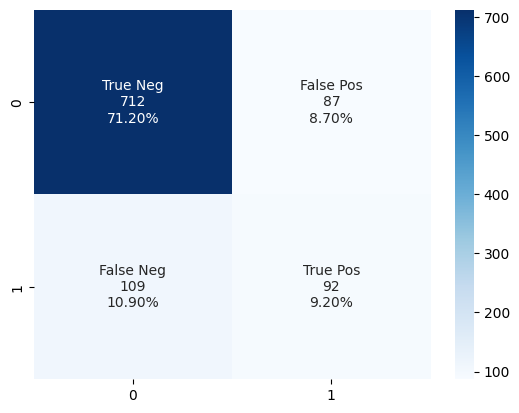

In [ ]:
#Decision tree

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print("Accuracy:", '{:.2%}'.format(accuracy))

cf_matrix = confusion_matrix(pred, y_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')

Accuracy: 82.10%


<Axes: >

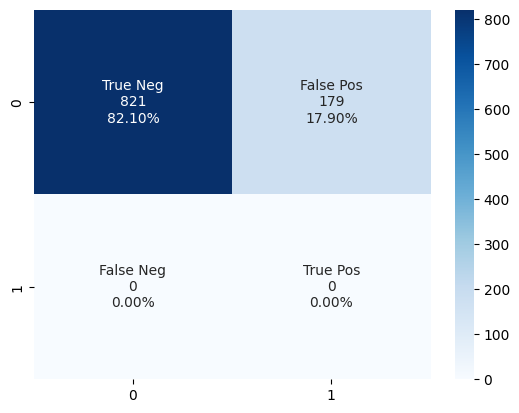

In [ ]:
#SVM

from sklearn import svm

clf = svm.SVC(C=1.0, kernel = 'rbf', probability = True, random_state = 124)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print("Accuracy:", '{:.2%}'.format(accuracy))

cf_matrix = confusion_matrix(pred, y_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')

Accuracy: 86.80%


<Axes: >

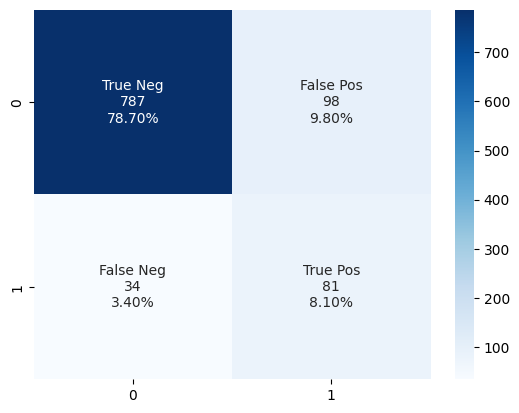

In [ ]:
#Random forest

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print("Accuracy:", '{:.2%}'.format(accuracy))

cf_matrix = confusion_matrix(pred, y_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')


Accuracy: 96.23%


<Axes: >

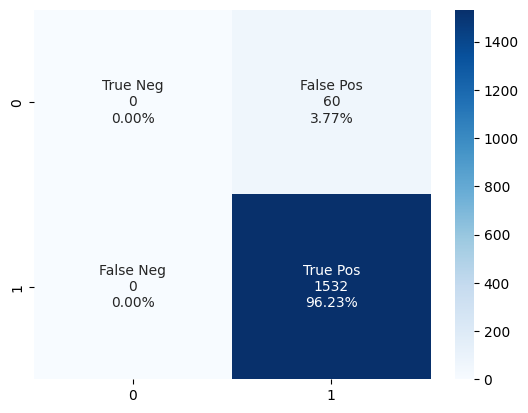

In [ ]:
#improved with SMOTE method

from imblearn.over_sampling import SMOTE

scaler = MinMaxScaler()

bumpy_features = ["Gender", "Age", "Balance",'IsActiveMember']

df_scaled = pd.DataFrame(data = X)
df_scaled[bumpy_features] = scaler.fit_transform(X[bumpy_features])

df_scaled.head()

X = df_scaled
sm  = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)


from sklearn.model_selection import KFold
k = 10
kf = KFold(n_splits = k, random_state = None)
kf.get_n_splits(X_res)

for train_index, test_index in kf.split(X_res):
    X_train, X_test = X_res.iloc[train_index,:], X_res.iloc[test_index,:]
    y_train, y_test = y_res[train_index], y_res[test_index]


clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print("Accuracy:", '{:.2%}'.format(accuracy))

cf_matrix = confusion_matrix(pred, y_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')